In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

[[30.83333333 74.66666667]
 [55.1        46.1       ]
 [43.2        16.7       ]
 [27.75       55.        ]]


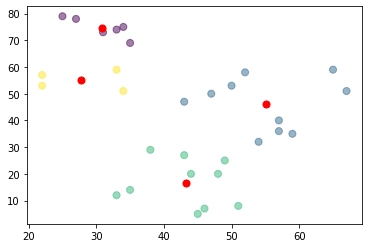

In [16]:
#EXAMPLE
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [5]:
donations13to17=pd.read_feather('donations13to17.ftr')

In [6]:
df=donations13to17[['id', 'cohort', 'yr0', 'yr1', 'amount_yr0', 'amount_yr1']].copy()

In [10]:
conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_retention']=np.select(conditions, choices)

In [11]:
conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df['yr1']/df['yr0'],
         df['yr1']/df['yr0'],
         df['yr1']/df['yr0'],
         df['yr1']/df['yr0'],
         df['yr1']/df['yr0']]

df['retention_yr1']=np.select(conditions, choices)

In [12]:
df13=df[df['cohort'].isin(['cohort13'])]

In [13]:
df13

,id,cohort,yr0,yr1,amount_yr0,amount_yr1,cohort_retention,retention_yr1
0,00000ce845c00cbf0686c992fc369df4,cohort13,1,0,50.0,0.0,0.194114,0.0
9,00005f52c98eeaf92b2414a352b023a4,cohort13,1,1,10.0,10.0,0.194114,1.0
12,0000889adf4cc958a35daee1f2529b48,cohort13,1,0,10.0,0.0,0.194114,0.0
15,0000a2175753bc165e53c408589a3bd6,cohort13,1,1,25.0,25.0,0.194114,1.0
24,0000c14308c4cb9259a4fe51f692c9ef,cohort13,1,1,50.0,25.0,0.194114,1.0
...,...,...,...,...,...,...,...,...
1876435,fffeaaba624f657e461686b9bfc08a5b,cohort13,1,0,25.0,0.0,0.194114,0.0
1876436,fffeb06eb87c9f8353c3bd4899ee1295,cohort13,1,0,75.0,0.0,0.194114,0.0
1876437,fffebb489764c9b9a48db83125477e26,cohort13,1,0,15.0,0.0,0.194114,0.0
1876438,fffed4187f3b5f17cb58536f7fac8dee,cohort13,1,0,27.0,0.0,0.194114,0.0


[[9.36331318e+01 1.94111876e-01]
 [4.42794380e+05 1.00000000e+00]]


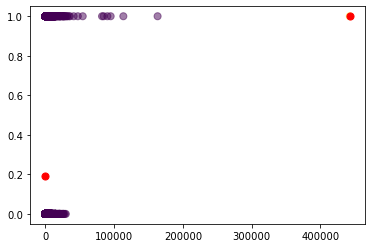

In [19]:
df = df13[['amount_yr0','yr1']].copy()
  
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['amount_yr0'], df['yr1'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [21]:
9.36331318e+01*1

93.6331318

In [24]:
d13a=df13.groupby('amount_yr0').count()['id'].reset_index()

In [25]:
d13a

,amount_yr0,id
0,0.40,1
1,1.00,9492
2,1.02,1
3,1.15,1
4,1.19,1
...,...,...
22105,90140.60,1
22106,94901.50,1
22107,113360.94,1
22108,163192.85,1


[[4.73834140e+02 1.70244151e+00]
 [4.42794380e+05 1.00000000e+00]
 [9.49015000e+04 1.00000000e+00]
 [1.41321081e+04 1.06451613e+00]
 [7.03226090e+03 1.19000000e+00]
 [2.50000000e+01 6.49130000e+04]
 [4.71232800e+04 1.00000000e+00]
 [1.63192850e+05 1.00000000e+00]
 [1.36676540e+03 1.04424779e+00]
 [2.00000000e+01 3.13840000e+04]
 [2.63197850e+04 1.00000000e+00]
 [3.17991628e+03 1.07329843e+00]
 [1.10929590e+04 1.00000000e+00]
 [2.00077029e+04 1.00000000e+00]
 [1.21259552e+02 2.71952635e+00]
 [4.45127475e+03 1.00000000e+00]
 [8.35016200e+04 1.00000000e+00]
 [1.13360940e+05 1.00000000e+00]
 [3.66666667e+01 5.85600000e+03]
 [2.09554778e+03 1.03703704e+00]
 [3.48914900e+04 1.00000000e+00]
 [5.00000000e+01 5.15230000e+04]
 [8.42879817e+02 1.13870968e+00]
 [4.10800200e+04 1.00000000e+00]
 [8.97586080e+03 1.00000000e+00]
 [1.60531457e+04 1.00000000e+00]
 [3.30355481e+02 2.15632458e+00]
 [7.83750000e+01 3.03312500e+03]
 [5.42840300e+04 1.00000000e+00]
 [9.97053579e+03 1.21052632e+00]
 [6.150654

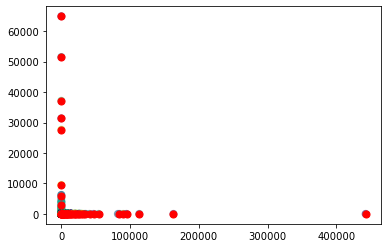

In [31]:
df = d13a[['amount_yr0','id']].copy()
  
kmeans = KMeans(n_clusters=50).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['amount_yr0'], df['id'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()